In [3]:
# 계속 바뀔 수가 있다.
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_mldata

from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pylab as plt
import time

In [ ]:
mnist = fetch_mldata("MNIST original")
mnist

In [6]:
t1 = time.time()
mnist_train_data_path = "data/01_MNIST_Kaggle_data/train.csv"
train = np.genfromtxt(mnist_train_data_path, delimiter=",",skip_header=1).astype(np.dtype("uint8"))
t2 = time.time()

print("Process Time : " + str(t2-t1))
print(train)

Process Time : 20.403395414352417
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [7 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]]


In [7]:
t1 =time.time()
mnist_test_data_path = "data/01_MNIST_Kaggle_data/test.csv"

test = np.genfromtxt(mnist_test_data_path, delimiter=",",skip_header=1).astype(np.dtype("uint8"))
t2 = time.time()

print("Process Time : " + str(t2-t1))
print(test)

Process Time : 13.811115503311157
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [8]:
print(len(train))
print(len(test))

42000
28000


In [9]:
train_data=train[:,1:]
train_labels = train[:,0]

- 받은 데이터가 실제 데이터가 의미하는 숫자(0~9) + 실제 데이터로 구성되어 있음
- 즉 1개의 데이터 값이
- 이를 통해서 라벨 + 데이터로 구분

train.csv: 785개 칼럼
test.csv : 784개 칼럼 (정답 뺐기 때문)

In [10]:
print(train_data)
print(train_labels)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[1 0 1 ... 7 6 9]


In [11]:
print(np.unique(train_labels))

[0 1 2 3 4 5 6 7 8 9]


In [14]:
# Method _ 01) numpy의 unique이용해서 처리
unique, counts = np.unique(train_labels, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 4132]
 [   1 4684]
 [   2 4177]
 [   3 4351]
 [   4 4072]
 [   5 3795]
 [   6 4137]
 [   7 4401]
 [   8 4063]
 [   9 4188]]


In [15]:
import seaborn as sns

In [16]:
print(train_data[0].shape)
print(np.sqrt(train_data[0].shape[0]))

(784,)
28.0


Text(0.5, 1, 'MNIST Digit Image _ Train Data Number1000')

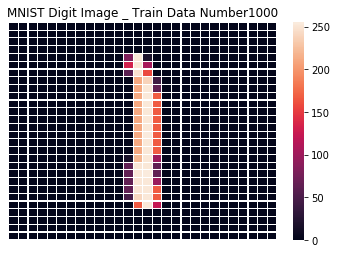

In [18]:
idx = 1000
image_data = train_data[idx]

# 1차원이기 때문에 실제값을 계산하기 위해서는 1차원의 길이값 획득  & 이를 제곱근으로 변환
tot_size = image_data.shape[0]
one_size = int(np.sqrt(tot_size))

# 그림으로 표현
# 28 x 28 로 변환하는 작업
sns.heatmap(np.reshape(image_data, (one_size, one_size)), linewidth=0.1, xticklabels=False, yticklabels=False)
plt.title(str("MNIST Digit Image _ Train Data Number") + str(idx))

In [19]:
from sklearn.neighbors import KNeighborsClassifier
# 평가하기 위해
from sklearn.metrics import accuracy_score
# bias는 낮아지지만 variance는 높아지는 과적합 오류를 줄이기 위해
from sklearn.model_selection import cross_val_score

#### 대충 툭 던져봐서 어느정도 걸리는지 알아봐야한다.

In [55]:
t1 = time.time()
# instantiate learning model ( k = 3)
# n_jobs = -1 하지 않으면, 시간이 많이 걸리게 된다. 실제에서 사용할 때에는 시간도 상당히 오래 걸린다.
knn = KNeighborsClassifier(n_neighbors=3, weights='distance', n_jobs=-1)
# 여기까지는 KNN을 사용하기 위한 세팅만 한 것
# 여기서 최적의 parameter를 찾는 것 (train data와 train 정답지가 필요)

# fitting the model (모델 학습시키기)
knn.fit(train_data, train_labels)

# predict the response (문제 푼 답, 예측치)
pred = knn.predict(test)

# 캐글에서는 나온 예측치를 올리면 채점을 해줌
t2 = time.time()

print("Process Time : " + str(t2-t1))

Process Time : 236.588481426239


In [57]:
# 출력용 만들기
img_id=[]
# summit 관련해서는 id가 1부터 시작되어야 하니, index matching 부분
for i in range(1, len(test)+1):
    img_id.append(i)
    
predMNIST = pd.DataFrame({"imageId":img_id, "Label":pred})

out_path = "data/01_MNIST_Kaggle_data/submission.csv"
predMNIST.to_csv(out_path, index=False)

## summit 하기
https://www.kaggle.com/c/digit-recognizer/leaderboard

## PCA로 시도
(주성분 분석)

In [58]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [59]:
num_comp = 0.8
pca = PCA(n_components=num_comp)

In [60]:
pca.fit(train_data)

PCA(copy=True, iterated_power='auto', n_components=0.8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [61]:
np.sum(pca.explained_variance_ratio_)

0.800314973684246

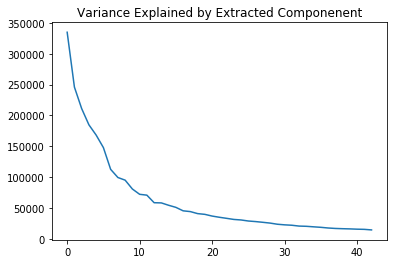

In [62]:
# plot the explained variance
plt.plot(pca.explained_variance_)
plt.title("Variance Explained by Extracted Componenent")
plt.show()

In [70]:
train_ext = pca.fit_transform(train_data)
print(train_ext.shape)

(42000, 43)


In [71]:
test_ext = pca.transform(test)
print(test_ext.shape)

(28000, 43)


In [72]:
min_max_scaler = MinMaxScaler()

In [73]:
train_norm = min_max_scaler.fit_transform(train_ext)
test_norm = min_max_scaler.fit_transform(test_ext)

In [75]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance', n_jobs=-1)
knn.fit(train_norm, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='distance')

In [76]:
pred = knn.predict(test_norm)

In [77]:
# 출력용 만들기
img_id=[]
# summit 관련해서는 id가 1부터 시작되어야 하니, index matching 부분
for i in range(1, len(test)+1):
    img_id.append(i)
    
predMNIST = pd.DataFrame({"imageId":img_id, "Label":pred})

out_path = "data/01_MNIST_Kaggle_data/submission.csv"
predMNIST.to_csv(out_path, index=False)